<p style="text-align:center">
</p>

# Stroke Prediction: Predictive Analytics with Machine Learning and Neural Networks



<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li>Introduction </a></li>
        <li>Libraries </li>
        <li>Data preprocessing</a></li>
        <li>Exploratory data analysis</a></li>
        <li>Modeling and results</a></li>
        <li>References</a></li>

</div>
<br>
<hr>


## Introduction

## Libraries


In [120]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam 
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from tensorflow.keras.utils import to_categorical
import missingno as msno


## Data Preprocessing

In [73]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [74]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [76]:
round (df.describe(exclude = ['float', 'int64']),2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


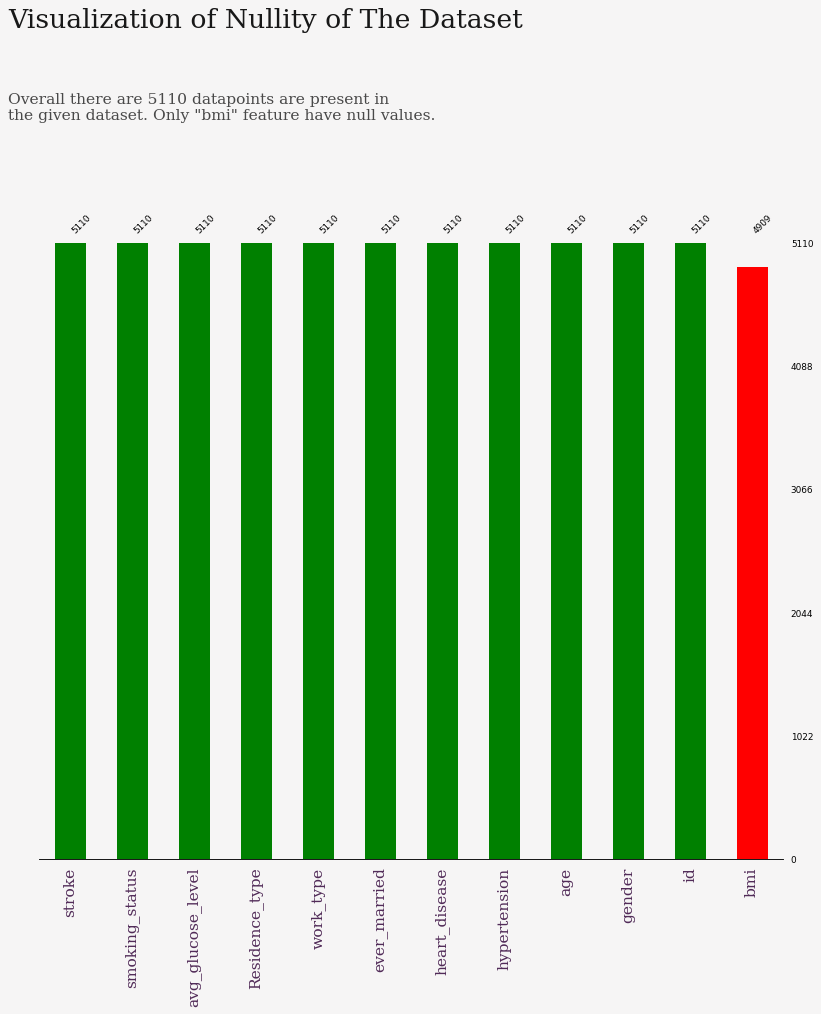

In [77]:
color = ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'red']
fig, ax = plt.subplots(figsize=(12, 10), dpi=80)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

msno.bar(df, sort='descending', color=color, ax=ax, fontsize=8, labels='off', filter='top')

ax.text(-1, 1.35, 'Visualization of Nullity of The Dataset', {'font': 'Serif', 'size': 24, 'color': 'black'}, alpha=0.9)
ax.text(-1, 1.2, 'Overall there are 5110 datapoints are present in \nthe given dataset. Only "bmi" feature have null values.',
        {'font': 'Serif', 'size': 14, 'color': 'black'}, alpha=0.7)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center',
                   **{'font': 'Serif', 'size': 14, 'weight': 'normal', 'color': '#FF7F24'}, alpha=1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)

plt.show()

In [78]:
#Fill missing values by median 
df['bmi'] = df['bmi'].fillna(round (df['bmi'].median(), 2))

In [79]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [80]:
df['bmi_cate'] = pd.cut(df['bmi'], bins = [0, 19, 25,30,1000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])
df['age_cate'] = pd.cut(df['age'], bins = [0,13,18, 45,60,200], labels = ['Children', 'Teens', 'Adults','Mid Adults','Elderly'])
df['glu_cate'] = pd.cut(df['avg_glucose_level'], bins = [0,90,160,230,500], labels = ['Low', 'Normal', 'High', 'Very High'])



<Figure size 1200x1000 with 0 Axes>

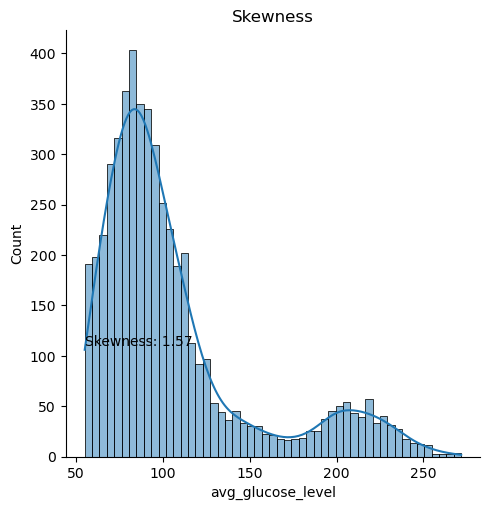

In [81]:
plt.figure(figsize=(12,10))
sns.displot(df['avg_glucose_level'], kde=True)
plt.title('Skewness')
#plt.axvline(df['avg_glucose_level'].mean(), color='red', linestyle='dashed', linewidth=1.5)
#plt.axvline(df['avg_glucose_level'].median(), color='green', linestyle='dashed', linewidth=1.5)
plt.text(min(df['avg_glucose_level']), 110, f"Skewness: {df['avg_glucose_level'].skew():.2f}", ha='left', fontsize=10)

plt.show()

<Figure size 1200x1000 with 0 Axes>

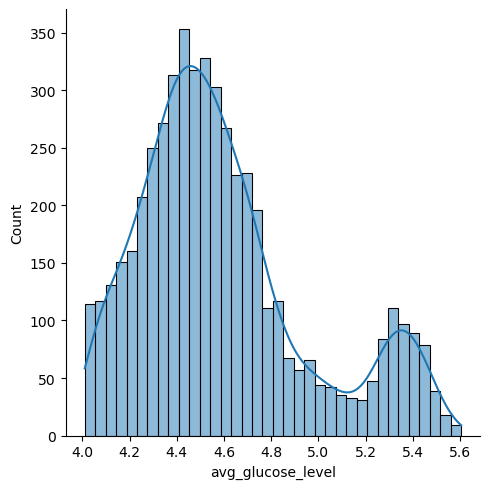

In [82]:
glu_log_transformed = np.log(df['avg_glucose_level'])
plt.figure(figsize=(12,10))
sns.displot(glu_log_transformed, kde=True)


<Figure size 1200x1000 with 0 Axes>

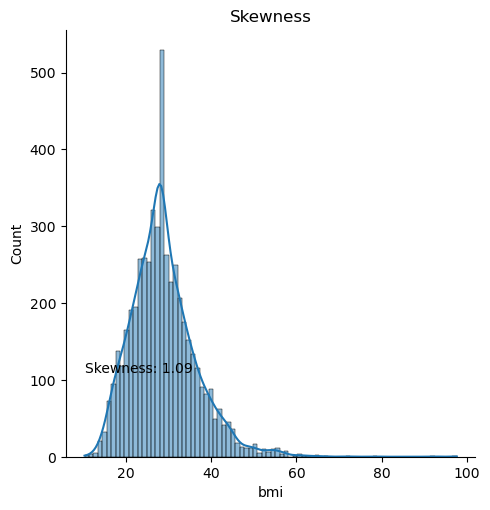

In [83]:
plt.figure(figsize=(12,10))
sns.displot(df['bmi'], kde=True)
plt.title('Skewness')
#plt.axvline(df['bmi'].mean(), color='red', linestyle='dashed', linewidth=1.5)
#plt.axvline(df['bmi'].median(), color='green', linestyle='dashed', linewidth=1.5)
plt.text(min(df['bmi']), 110, f"Skewness: {df['bmi'].skew():.2f}", ha='left', fontsize=10)

plt.show()

<Figure size 1200x1000 with 0 Axes>

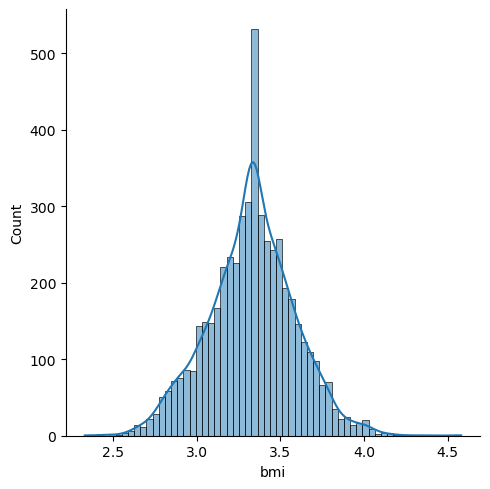

In [84]:
bmi_log_transformed = np.log(df['bmi'])

plt.figure(figsize=(12,10))
sns.displot(bmi_log_transformed, kde=True)

In [85]:
df_copy2 = df.copy()

In [86]:
df_copy2['avg_glucose_level'] = glu_log_transformed
df_copy2['bmi'] = bmi_log_transformed

## Exploratory Data Analysis

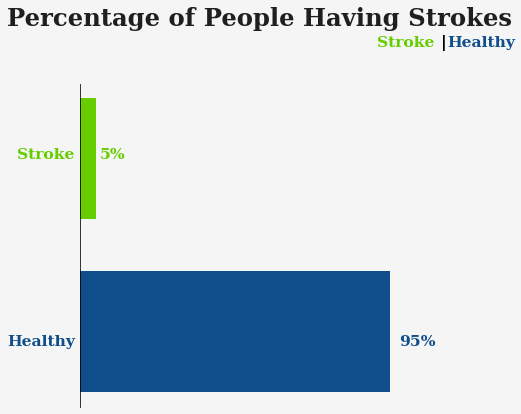

In [87]:
x = pd.DataFrame( df.groupby(['stroke'])['stroke'].count())

# plot
fig, ax = plt.subplots(figsize=(6, 6), dpi=70)
ax.barh([1], x.stroke[1], height=0.7, color='#66CD00')
plt.text(-1150, -0.08, 'Healthy', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'style': 'normal', 'color': '#104E8B'})
plt.text(5000, -0.08, '95%', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': '#104E8B'})
ax.barh([0], x.stroke[0], height=0.7, color='#104E8B')
plt.text(-1000, 1, 'Stroke', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'style': 'normal', 'color': '#66CD00'})
plt.text(300, 1, '5%', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': '#66CD00'})

fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

plt.text(-1150, 1.77, 'Percentage of People Having Strokes', {'font': 'Serif', 'size': 25, 'weight': 'bold', 'color': '#1F1F1F'})
plt.text(4650, 1.65, 'Stroke', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'style': 'normal', 'color': '#66CD00'})
plt.text(5650, 1.65, '|', {'color': 'black', 'size': 16, 'weight': 'bold'})
plt.text(5750, 1.65, 'Healthy', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'style': 'normal', 'weight': 'bold', 'color': '#104E8B'})



ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

C:\Users\Predator\AppData\Local\Temp\ipykernel_15804\3805718780.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df, x = 'age', ax = ax2, shade = True, color = '#6E7B8B', alpha = 1, )
C:\Users\Predator\AppData\Local\Temp\ipykernel_15804\3805718780.py:41: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df[df['stroke'] == 0], x = 'age',ax = ax3, shade = True,  alpha = 1, color = '#FF7F24' )
C:\Users\Predator\AppData\Local\Temp\ipykernel_15804\3805718780.py:42: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df[df['stroke'] == 1], x = 'age',ax = ax3, shade = True,  alpha = 0.8, color = '#00CED1')
C:\Use

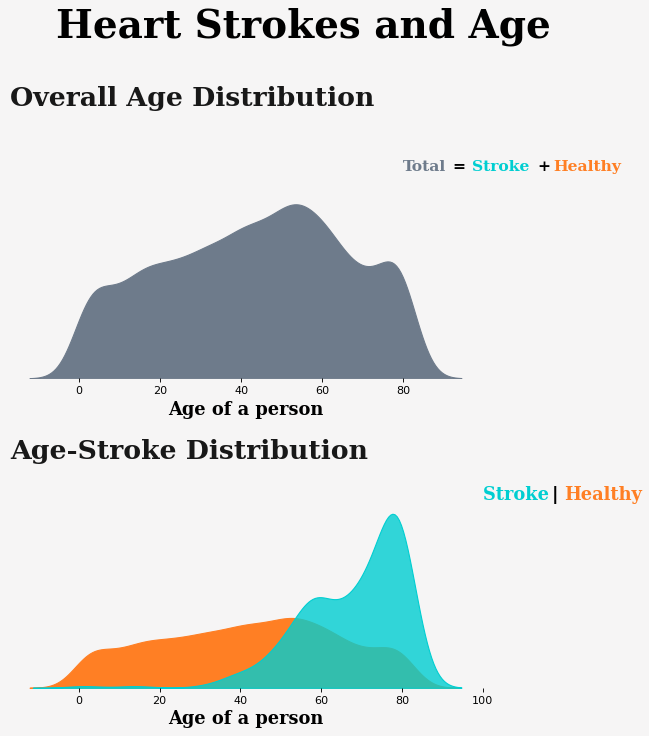

In [88]:
fig = plt.figure(figsize = (24,10), dpi = 80)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax2 = fig.add_subplot(gs[1:4,0:8]) #distribution plot
ax3 = fig.add_subplot(gs[6:9, 0:8]) #hue distribution plot

# axes list
axes = [ ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        

# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'age', ax = ax2, shade = True, color = '#6E7B8B', alpha = 1, )
ax2.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(-17,0.025,'Overall Age Distribution', {'font':'Serif', 'color': 'black','weight':'bold','size':24}, alpha = 0.9)

ax2.text(80,0.019, 'Total',{'font':'Serif', 'size':'14','color': '#6E7B8B','weight':'bold'})
ax2.text(92,0.019, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(97,0.019, 'Stroke',{'font':'Serif', 'size':'14','color': '#00CED1','weight':'bold'})
ax2.text(113,0.019, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(117,0.019, 'Healthy',{'font':'Serif', 'size':'14','color': '#FF7F24','weight':'bold'})



# distribution plots with hue of strokes


sns.kdeplot(data = df[df['stroke'] == 0], x = 'age',ax = ax3, shade = True,  alpha = 1, color = '#FF7F24' )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'age',ax = ax3, shade = True,  alpha = 0.8, color = '#00CED1')

ax3.set_xlabel('Age of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax3.text(-17,0.0525,'Age-Stroke Distribution', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24}, alpha= 0.9)

ax3.text(100,0.043, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#00CED1'})
ax3.text(117,0.043, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax3.text(120,0.043, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#FF7F24'})

fig.text(0.15,1,'Heart Strokes and Age',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})
fig.show()

C:\Users\Predator\AppData\Local\Temp\ipykernel_15804\2505444464.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df, x = 'avg_glucose_level', ax = ax2, shade = True, color = '#6E7B8B', alpha = 1, )
C:\Users\Predator\AppData\Local\Temp\ipykernel_15804\2505444464.py:40: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df[df['stroke'] == 0], x = 'avg_glucose_level',ax = ax3, shade = True,  alpha = 1, color = '#FF7F24' )
C:\Users\Predator\AppData\Local\Temp\ipykernel_15804\2505444464.py:41: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df[df['stroke'] == 1], x = 'avg_glucose_level',ax = ax3, shade = Tru

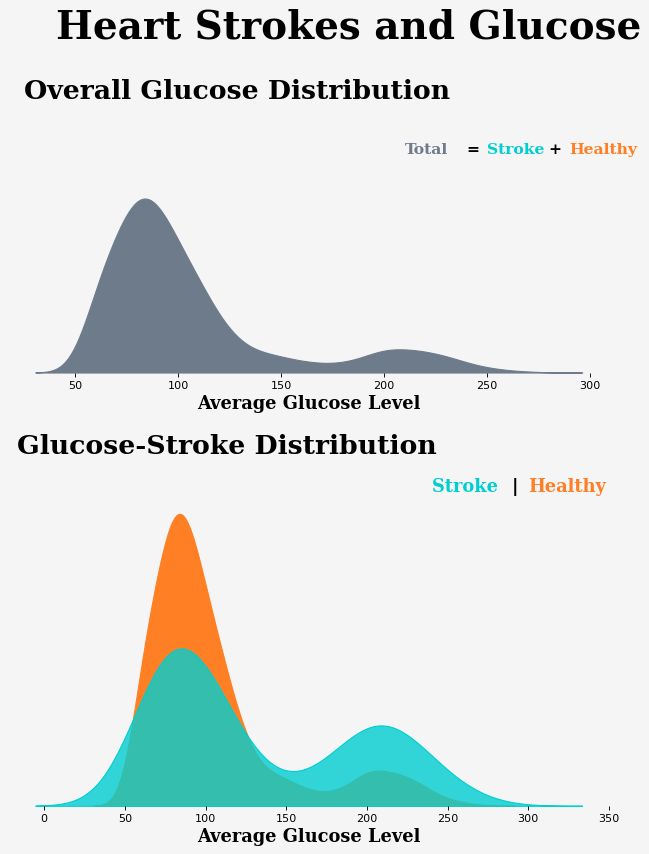

In [90]:
fig = plt.figure(figsize = (24,10), dpi = 80)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax2 = fig.add_subplot(gs[0:3,0:10]) #distribution plot
ax3 = fig.add_subplot(gs[5:10, 0:10]) #hue distribution plot

# axes list
axes = [ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        
# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'avg_glucose_level', ax = ax2, shade = True, color = '#6E7B8B', alpha = 1, )
ax2.set_xlabel('Average Glucose Level', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(25,0.025,'Overall Glucose Distribution', {'font':'Serif', 'color': 'black','weight':'bold','size':24})

ax2.text(210,0.020, 'Total',{'font':'Serif', 'size':'14','color': '#6E7B8B','weight':'bold'})
ax2.text(240,0.02, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(250,0.02, 'Stroke',{'font':'Serif', 'size':'14','color': '#00CED1','weight':'bold'})
ax2.text(280,0.02, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(290,0.02, 'Healthy',{'font':'Serif', 'size':'14','color': '#FF7F24','weight':'bold'})



# distribution plots with hue of strokes


sns.kdeplot(data = df[df['stroke'] == 0], x = 'avg_glucose_level',ax = ax3, shade = True,  alpha = 1, color = '#FF7F24' )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'avg_glucose_level',ax = ax3, shade = True,  alpha = 0.8, color = '#00CED1')

ax3.set_xlabel('Average Glucose Level', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax3.text(-17,0.0195,'Glucose-Stroke Distribution', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24})

ax3.text(240,0.0174, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#00CED1'})
ax3.text(290,0.0174, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax3.text(300,0.0174, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#FF7F24'})


fig.text(0.15,1.07,'Heart Strokes and Glucose',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})

fig.show()

C:\Users\Predator\AppData\Local\Temp\ipykernel_15804\928277998.py:25: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df, x = 'bmi', ax = ax2, shade = True, color = '#6E7B8B', alpha = 1, )
C:\Users\Predator\AppData\Local\Temp\ipykernel_15804\928277998.py:39: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df[df['stroke'] == 0], x = 'bmi',ax = ax3, shade = True,  alpha = 1, color = '#FF7F24' )
C:\Users\Predator\AppData\Local\Temp\ipykernel_15804\928277998.py:40: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df[df['stroke'] == 1], x = 'bmi',ax = ax3, shade = True,  alpha = 0.8, color = '#00CED1')
C:\Users\

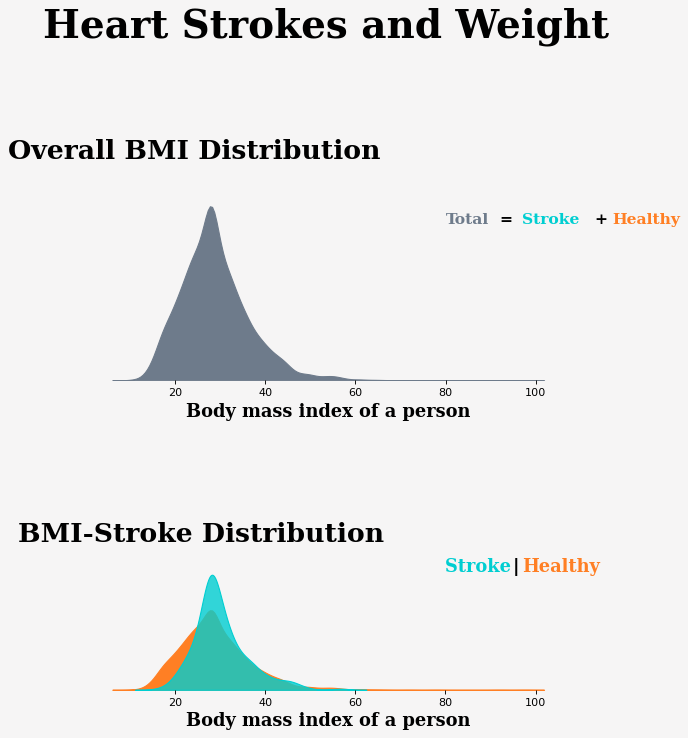

In [91]:
fig = plt.figure(figsize = (24,10),dpi = 80)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax2 = fig.add_subplot(gs[2:5,0:8]) #distribution plot
ax3 = fig.add_subplot(gs[8:10, 0:8]) #hue distribution plot

# axes list
axes = [ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        
# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'bmi', ax = ax2, shade = True, color = '#6E7B8B', alpha = 1, )
ax2.set_xlabel('Body mass index of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(-17,0.085,'Overall BMI Distribution', {'font':'Serif', 'color': 'black','weight':'bold','size':24})

ax2.text(80,0.06, 'Total',{'font':'Serif', 'size':'14','color': '#6E7B8B','weight':'bold'})
ax2.text(92,0.06, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(97,0.06, 'Stroke',{'font':'Serif', 'size':'14','color': '#00CED1','weight':'bold'})
ax2.text(113,0.06, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(117,0.06, 'Healthy',{'font':'Serif', 'size':'14','color': '#FF7F24','weight':'bold'})


# distribution plots with hue of strokes


sns.kdeplot(data = df[df['stroke'] == 0], x = 'bmi',ax = ax3, shade = True,  alpha = 1, color = '#FF7F24' )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'bmi',ax = ax3, shade = True,  alpha = 0.8, color = '#00CED1')

ax3.set_xlabel('Body mass index of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax3.text(-15,0.12,'BMI-Stroke Distribution', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24})

ax3.text(80,0.095, 'Stroke ', {'font': 'Serif','weight':'bold','size': '16','weight':'bold','style':'normal', 'color':'#00CED1'})
ax3.text(95,0.095, '|', {'color':'black' , 'size':'16', 'weight': 'bold'})
ax3.text(97,0.095, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '16','style':'normal', 'weight':'bold','color':'#FF7F24'})

fig.text(0.1,0.925,'Heart Strokes and Weight',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})

fig.show()

In [92]:
'''
fig = plt.figure(figsize = (8,6),dpi = 80)

gs = fig.add_gridspec(10,24)
gs.update(wspace = 1, hspace = 0.05)


ax2 = fig.add_subplot(gs[2:5,0:8]) #distribution plot
ax3 = fig.add_subplot(gs[8:10, 0:8]) #hue distribution plot

# axes list
axes = [ax2, ax3]

# setting of axes; visibility of axes and spines turn off
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor('#f6f5f5')
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor('#f6f5f5')
        
# distribution plots ---- only single variable

sns.kdeplot(data = df, x = 'bmi', ax = ax2, fill = True, color = '#6E7B8B', alpha = 1, )
ax2.set_xlabel('Body mass index of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })
ax2.text(1,3,'Overall BMI Distribution', {'font':'Serif', 'color': 'black','weight':'bold','size':24})

ax2.text(6,0.06, 'Total',{'font':'Serif', 'size':'14','color': '#6E7B8B','weight':'bold'})
ax2.text(7,0.06, '=',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(7.6,0.06, 'Stroke',{'font':'Serif', 'size':'14','color': '#00CED1','weight':'bold'})
ax2.text(9,0.06, '+',{'font':'Serif', 'size':'14','color': 'black','weight':'bold'})
ax2.text(9.8,0.06, 'Healthy',{'font':'Serif', 'size':'14','color': '#FF7F24','weight':'bold'})


# distribution plots with hue of strokes


sns.kdeplot(data = df[df['stroke'] == 0], x = 'bmi',ax = ax3, fill = True,  alpha = 1, color = '#FF7F24' )
sns.kdeplot(data = df[df['stroke'] == 1], x = 'bmi',ax = ax3, fill = True,  alpha = 0.8, color = '#00CED1')

ax3.set_xlabel('Body mass index of a person', fontdict = {'font':'Serif', 'color': 'black', 'weight':'bold','size': 16})

ax3.text(0.8,4,'BMI-Stroke Distribution', {'font':'Serif', 'weight':'bold','color': 'black', 'size':24})

ax3.text(6,0.095, 'Stroke ', {'font': 'Serif','weight':'bold','size': '14','weight':'bold','style':'normal', 'color':'#00CED1'})
ax3.text(7.3,0.095, '|', {'color':'black' , 'size':'14', 'weight': 'bold'})
ax3.text(7.5,0.095, 'Healthy', {'font': 'Serif','weight':'bold', 'size': '14','style':'normal', 'weight':'bold','color':'#FF7F24'})

fig.text(0.1,0.925,'Heart Strokes and Weight',{'font':'Serif', 'weight':'bold','color': 'black', 'size':35})

fig.show()
'''

"\nfig = plt.figure(figsize = (8,6),dpi = 80)\n\ngs = fig.add_gridspec(10,24)\ngs.update(wspace = 1, hspace = 0.05)\n\n\nax2 = fig.add_subplot(gs[2:5,0:8]) #distribution plot\nax3 = fig.add_subplot(gs[8:10, 0:8]) #hue distribution plot\n\n# axes list\naxes = [ax2, ax3]\n\n# setting of axes; visibility of axes and spines turn off\nfor ax in axes:\n    ax.axes.get_yaxis().set_visible(False)\n    ax.set_facecolor('#f6f5f5')\n    \n    for loc in ['left', 'right', 'top', 'bottom']:\n        ax.spines[loc].set_visible(False)\n\nfig.patch.set_facecolor('#f6f5f5')\n        \n# distribution plots ---- only single variable\n\nsns.kdeplot(data = df, x = 'bmi', ax = ax2, fill = True, color = '#6E7B8B', alpha = 1, )\nax2.set_xlabel('Body mass index of a person', fontdict = {'font':'Serif', 'color': 'black', 'size': 16,'weight':'bold' })\nax2.text(1,3,'Overall BMI Distribution', {'font':'Serif', 'color': 'black','weight':'bold','size':24})\n\nax2.text(6,0.06, 'Total',{'font':'Serif', 'size':'14','c

In [98]:
df_copy2.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cate,age_cate,glu_cate
0,9046,Male,67.0,0,1,Yes,Private,Urban,5.432367,3.600048,formerly smoked,1,Obesity,Elderly,High
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,5.309307,3.335770,never smoked,1,Overweight,Elderly,High
2,31112,Male,80.0,0,1,Yes,Private,Rural,4.662684,3.481240,never smoked,1,Obesity,Elderly,Normal
3,60182,Female,49.0,0,0,Yes,Private,Urban,5.143008,3.538057,smokes,1,Obesity,Mid Adults,High
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,5.159745,3.178054,never smoked,1,Ideal,Elderly,High


In [99]:
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'bmi_cate', 'age_cate', 'glu_cate']
label_encoder = preprocessing.LabelEncoder()
for col in categorical_cols:
    df_copy2[col] = label_encoder.fit_transform(df_copy2[col])

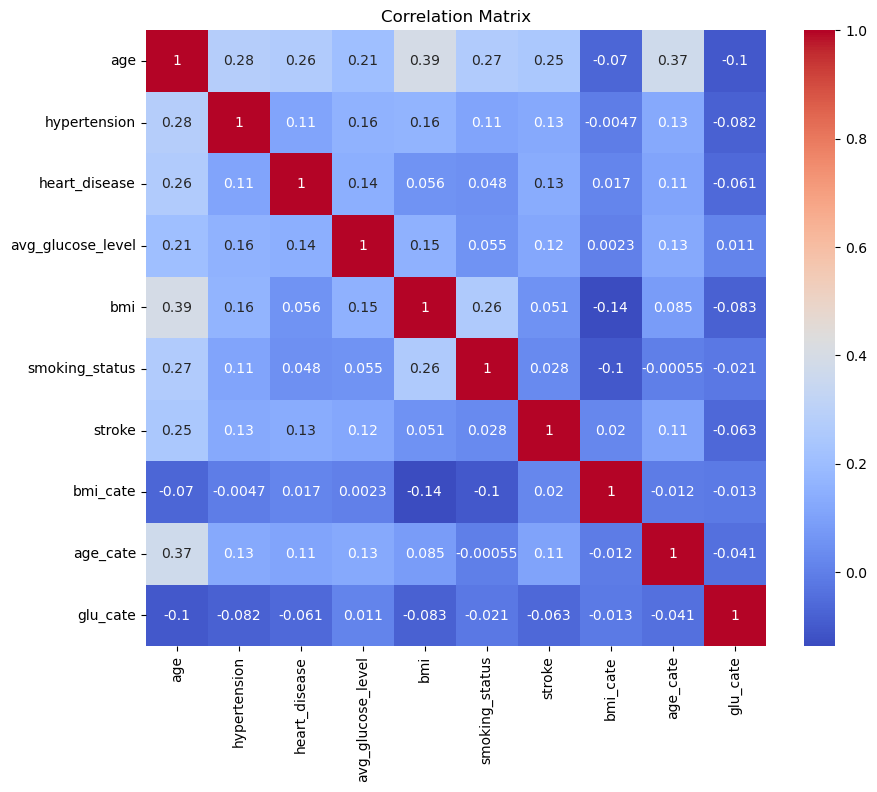

In [100]:
numeric_cols = ['age', 'hypertension','heart_disease', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke', 'bmi_cate', 'age_cate', 'glu_cate' ]
corr_matrix = df_copy2[numeric_cols].corr()

plt.figure(figsize= (10, 8))
sns.heatmap(corr_matrix, annot= True, cmap= 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [20]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cate,age_cate,glu_cate
0,9046,Male,67.0,0,1,Yes,Private,Urban,5.432367,3.600048,formerly smoked,1,Obesity,Elderly,High
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,5.309307,3.335770,never smoked,1,Overweight,Elderly,High
2,31112,Male,80.0,0,1,Yes,Private,Rural,4.662684,3.481240,never smoked,1,Obesity,Elderly,Normal
3,60182,Female,49.0,0,0,Yes,Private,Urban,5.143008,3.538057,smokes,1,Obesity,Mid Adults,High
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,5.159745,3.178054,never smoked,1,Ideal,Elderly,High


In [24]:
'''
ordinal = ['age_cate',  'glu_cate', 'bmi_cate','hypertension', 'heart_disease'] # label enconding
nominal =  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] 
numerical = ['age','bmi', 'avg_glucose_level'] 

X = df.drop(['stroke','id'], axis = 1)
y = df['stroke']

## label encoding of ordinal categorical features
for col in ordinal:
    X[col] = label_encoder.fit_transform(X[col])
    
standard= preprocessing.StandardScaler()    
## normalizing with standard scaler of numerical features
X[numerical] = standard.fit_transform(X[numerical])

## norminal data one hot encoding for categorical features
temp = X.drop(columns = nominal)
dummies = pd.get_dummies(X[nominal])
X = pd.concat([temp,dummies], axis = 1)
'''

"\nordinal = ['age_cate',  'glu_cate', 'bmi_cate','hypertension', 'heart_disease'] # label enconding\nnominal =  ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] \nnumerical = ['age','bmi', 'avg_glucose_level'] \n\nX = df.drop(['stroke','id'], axis = 1)\ny = df['stroke']\n\n## label encoding of ordinal categorical features\nfor col in ordinal:\n    X[col] = label_encoder.fit_transform(X[col])\n    \nstandard= preprocessing.StandardScaler()    \n## normalizing with standard scaler of numerical features\nX[numerical] = standard.fit_transform(X[numerical])\n\n## norminal data one hot encoding for categorical features\ntemp = X.drop(columns = nominal)\ndummies = pd.get_dummies(X[nominal])\nX = pd.concat([temp,dummies], axis = 1)\n"

In [101]:
X = df_copy2.drop(['stroke', 'id'], axis= 1)
y = df['stroke']

## Modeling and Results

In [102]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size= 0.3, shuffle= True , random_state= 142)
print(X_val_test.shape)
print(X_train.shape)

(1533, 13)
(3577, 13)


In [103]:
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size= 0.5)

In [104]:
rf_classifier = RandomForestClassifier(random_state= 42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test) 

acc = accuracy_score(y_pred, y_test)
print(acc)

0.9439374185136897


In [127]:
accuracy_rf = accuracy_score(y_test, y_pred)

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score
classification_rep = classification_report(y_test, y_pred)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)
print("ROC AUC Score:", roc_auc)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)

Accuracy: 0.9439374185136897
Confusion Matrix:
 [[724   1]
 [ 42   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       725
           1       0.00      0.00      0.00        42

    accuracy                           0.94       767
   macro avg       0.47      0.50      0.49       767
weighted avg       0.89      0.94      0.92       767

ROC AUC Score: 0.4993103448275862
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


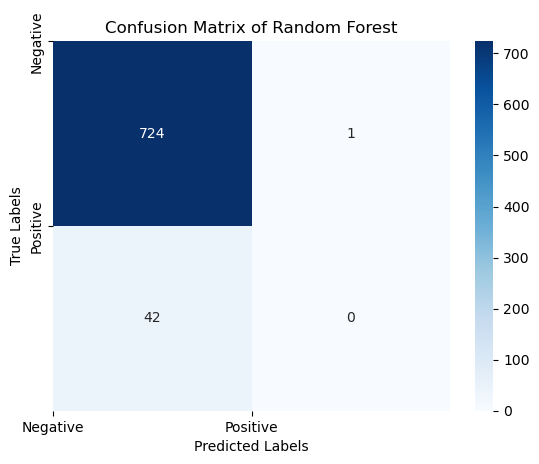

In [125]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Random Forest')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.yticks(ticks=[0, 1], labels=['Negative', 'Positive'])

# Display the plot
plt.show()

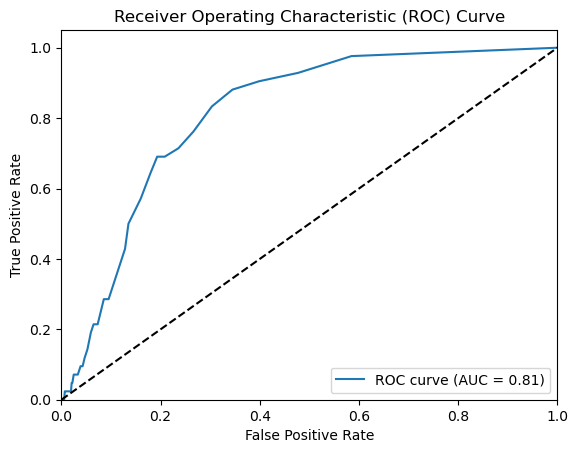

In [118]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]
# Assuming you have y_true (actual labels) and y_pred_proba (predicted probabilities)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Display the plot
plt.show()

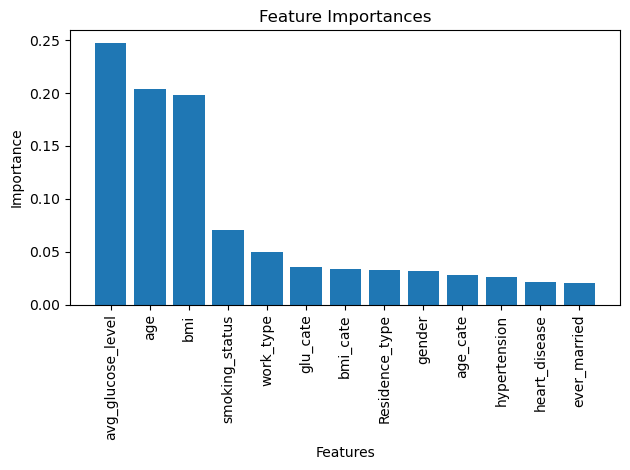

In [105]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'bmi_cate', 'age_cate', 'glu_cate']
plt.figure()
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation= 90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [106]:
dtree = DecisionTreeClassifier()
dtree_ = dtree.fit(X_train, y_train)
score = dtree.score(X_test, y_test)

print("Accuracy score:", score)

Accuracy score: 0.9048239895697523


In [129]:
y_pred_dtree = dtree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dtree)
precision_dt = precision_score(y_test, y_pred_dtree)
recall_dt = recall_score(y_test, y_pred_dtree)
f1_dt = f1_score(y_test, y_pred_dtree)
confusion_mat = confusion_matrix(y_test, y_pred_dtree)

# Print the evaluation metrics and confusion matrix
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 Score:", f1_dt)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.9048239895697523
Precision: 0.13953488372093023
Recall: 0.14285714285714285
F1 Score: 0.1411764705882353
Confusion Matrix:
[[688  37]
 [ 36   6]]


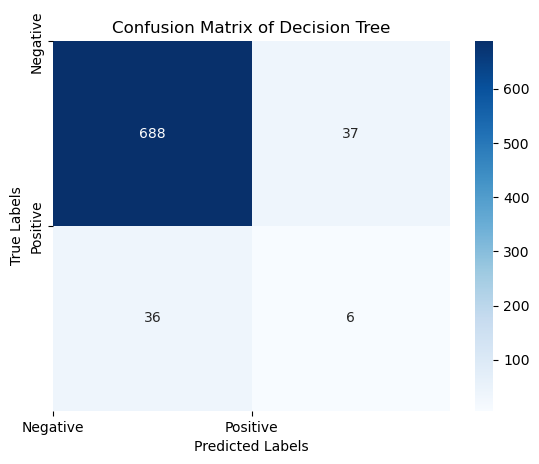

In [126]:
cm = confusion_matrix(y_test, y_pred_dtree)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels, title, and ticks
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Decision Tree')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.yticks(ticks=[0, 1], labels=['Negative', 'Positive'])

# Display the plot
plt.show()

In [107]:
nn_model = Sequential([
    Dense(17, input_dim= 13, activation= 'relu'),
    Dense(15, activation= 'relu'),
    Dense(1, activation= 'sigmoid')
])

In [108]:
nn_model.compile(optimizer= Adam(learning_rate= 0.001, beta_1= 0.9, beta_2= 0.99,
                                 epsilon= 1e-05, amsgrad= False, name= 'Adam'),
                 loss='binary_crossentropy', metrics= ['accuracy'])
hist= nn_model.fit(X_train, y_train.values.ravel(), epochs= 100, validation_data= (X_val, y_val))

Epoch 1/100
112/112 [==============================] - 2s 8ms/step - loss: 0.4297 - accuracy: 0.9511 - val_loss: 0.1596 - val_accuracy: 0.9582
Epoch 2/100
112/112 [==============================] - 1s 6ms/step - loss: 0.1768 - accuracy: 0.9511 - val_loss: 0.1489 - val_accuracy: 0.9582
Epoch 3/100
112/112 [==============================] - 1s 11ms/step - loss: 0.1740 - accuracy: 0.9505 - val_loss: 0.1446 - val_accuracy: 0.9582
Epoch 4/100
112/112 [==============================] - 2s 14ms/step - loss: 0.1722 - accuracy: 0.9511 - val_loss: 0.1457 - val_accuracy: 0.9582
Epoch 5/100
112/112 [==============================] - 1s 8ms/step - loss: 0.1696 - accuracy: 0.9511 - val_loss: 0.1438 - val_accuracy: 0.9582
Epoch 6/100
112/112 [==============================] - 1s 6ms/step - loss: 0.1686 - accuracy: 0.9508 - val_loss: 0.1396 - val_accuracy: 0.9582
Epoch 7/100
112/112 [==============================] - 1s 7ms/step - loss: 0.1676 - accuracy: 0.9508 - val_loss: 0.1400 - val_accuracy: 0.95

In [109]:
print(nn_model.evaluate(X_test, y_test))

 1/24 [>.............................] - ETA: 0s - loss: 0.1178 - accuracy: 0.9688

24/24 [==============================] - 0s 3ms/step - loss: 0.1725 - accuracy: 0.9452
[0.17250993847846985, 0.9452412128448486]


In [110]:
y_predicted_nn_model = nn_model.predict(X_test)
y_predicted_nn_model = np.round(y_predicted_nn_model)

print("Classification Report: \n", classification_report(y_test, y_predicted_nn_model, zero_division= 0))

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       725
           1       0.00      0.00      0.00        42

    accuracy                           0.95       767
   macro avg       0.47      0.50      0.49       767
weighted avg       0.89      0.95      0.92       767



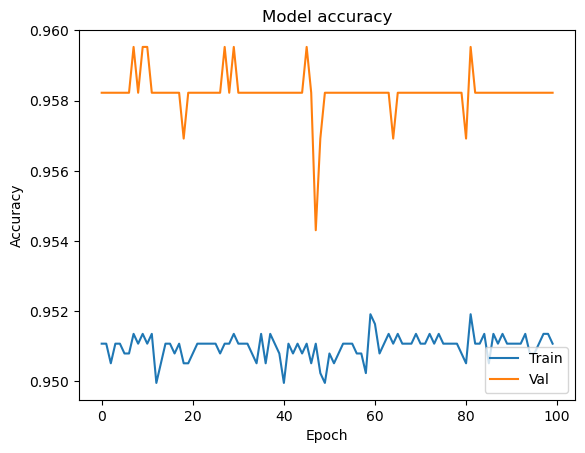

In [111]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


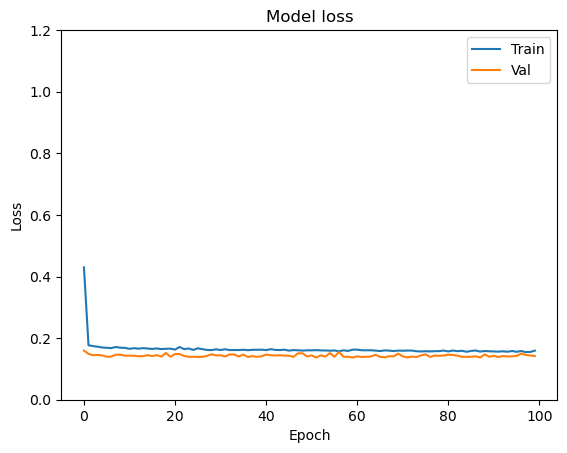

In [112]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

In [132]:
y_pred_nn = nn_model.predict(X_test)
y_pred_nn_binary = np.where(y_pred_nn > 0.7, 1, 0)
accuracy_nn = accuracy_score(y_test, y_pred_nn_binary)
precision_nn = precision_score(y_test, y_pred_nn_binary)
recall_nn = recall_score(y_test, y_pred_nn_binary)
f1_nn = f1_score(y_test, y_pred_nn_binary)

# Print the evaluation metrics and confusion matrix
print("Accuracy:", accuracy_nn)
print("Precision:", precision_nn)
print("Recall:", recall_nn)
print("F1 Score:", f1_nn)

Accuracy: 0.9452411994784876
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


c:\Users\Predator\anaconda3\envs\TF_002\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


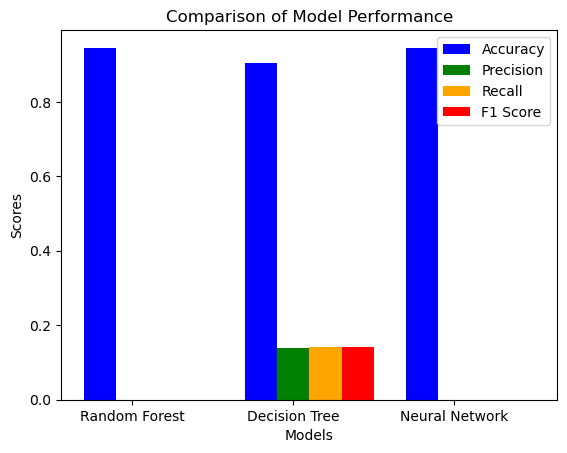

In [133]:


# Evaluation metrics for the three models
accuracy = [accuracy_rf, accuracy_dt, accuracy_nn]
precision = [precision_rf, precision_dt, precision_nn]
recall = [recall_rf, recall_dt, recall_nn]
f1_score = [f1_rf, f1_dt, f1_nn]

# Models labels
models = ['Random Forest', 'Decision Tree', 'Neural Network']

# Set the width of the bars
bar_width = 0.2

# Set the position of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create the bar plot
plt.bar(r1, accuracy, color='blue', width=bar_width, label='Accuracy')
plt.bar(r2, precision, color='green', width=bar_width, label='Precision')
plt.bar(r3, recall, color='orange', width=bar_width, label='Recall')
plt.bar(r4, f1_score, color='red', width=bar_width, label='F1 Score')

# Add x-axis labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Model Performance')
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add legend
plt.legend()

# Show the plot
plt.show()


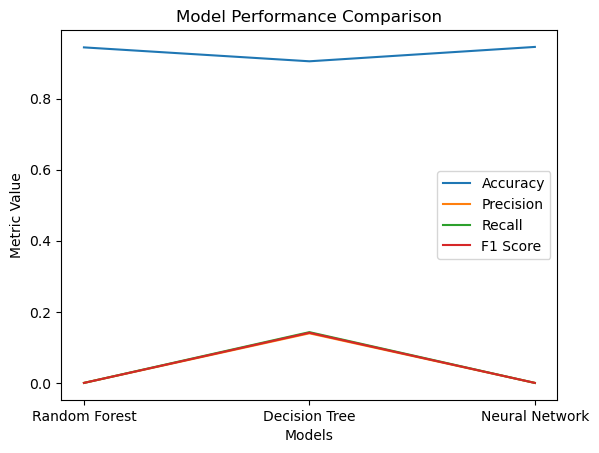

In [135]:


# Evaluation metric values for each model
accuracy_values = [accuracy_rf, accuracy_dt, accuracy_nn]
precision_values = [precision_rf, precision_dt, precision_nn]
recall_values = [recall_rf, recall_dt, recall_nn]
f1_values = [f1_rf, f1_dt, f1_nn]

# Model names
model_names = ['Random Forest', 'Decision Tree', 'Neural Network']

# Plotting the line graph
plt.plot(model_names, accuracy_values, label='Accuracy')
plt.plot(model_names, precision_values, label='Precision')
plt.plot(model_names, recall_values, label='Recall')
plt.plot(model_names, f1_values, label='F1 Score')

# Set the title and labels
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Metric Value')

# Add a legend
plt.legend()

# Display the plot
plt.show()


## References
